In [1]:
%matplotlib notebook
import silq
silq.initialize("EWJN", mode='analysis')

from silq.tests.test_parameters import GaussianParameter, Gaussian2DParameter
from silq.measurements.measurement_modules import *
from silq.measurements.measurement_types import *

dummy_parameter = ManualParameter(name='dummy', initial_value=0)
dummy_parameter2 = ManualParameter(name='dummy2', initial_value=0)
gaussian_parameter = GaussianParameter('gaussian', set_parameter=dummy_parameter, std=4)
gaussian_2D_parameter = Gaussian2DParameter('gaussian', set_parameters=[dummy_parameter, dummy_parameter2], std=4)

qc.show_subprocess_widget()

Initializing imports


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<IPython.core.display.Javascript object>

Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


# Loop measurements

## Loop 0D measurement

In [3]:
loop0D_msmt = Loop0DMeasurement('loop_0D', acquisition_parameter=gaussian_parameter,
                                discriminant='gaussian')
condition_set = ConditionSet(('gaussian', '>', 0.9))
loop0D_msmt.condition_sets = [condition_set]
data =loop0D_msmt()

DataSet:
   mode = DataMode.LOCAL
   data = qc.load_data('2017-01-02/#028_loop_0D_gaussian_11-23-19')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | single_set | single       | (1,)
   Measured | gaussian   | gaussian     | (1,)
acquired at 2017-01-02 11:23:19


In [4]:
loop0D_msmt.get_optimum()

satisfied_idx: [0]
satisfied_arr_1D: [ True]
measurement_vals_1D: [ 1.]
max_idx: 0
self.optimal_set_vals: {}


({}, 1.0)

## Loop 1D measurement

In [5]:
loop1D_msmt = Loop1DMeasurement('loop_1D', acquisition_parameter=gaussian_parameter, 
                                set_parameter=dummy_parameter, discriminant='gaussian')
condition_set = ConditionSet(('gaussian', '>', 0.9))
loop1D_msmt.condition_sets = [condition_set]

data = loop1D_msmt(step=0.1, points=10)
data =loop1D_msmt()

DataSet:
   mode = DataMode.LOCAL
   data = qc.load_data('2017-01-02/#029_loop_1D_dummy_gaussian_11-23-20')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | dummy_set  | dummy        | (10,)
   Measured | gaussian   | gaussian     | (10,)
started at 2017-01-02 11:23:20


In [6]:
data.sync()
data.gaussian

DataArray[10]: gaussian
array([ 0.987,  0.992,  0.996,  0.999,  1.   ,  1.   ,  0.999,  0.996,
        0.992,  0.987])

## Loop 2D measurement

In [2]:
loop2D_msmt = Loop2DMeasurement('loop_2D', acquisition_parameter=gaussian_2D_parameter, 
                                set_parameters=[dummy_parameter2, dummy_parameter],
                                discriminant='gaussian', silent=False)
condition_set = ConditionSet(('gaussian', '>', 0.99), update=True)
loop2D_msmt.condition_sets = [condition_set]
loop2D_msmt(steps=1, points=11)
data =loop2D_msmt()

DataSet:
   mode = DataMode.LOCAL
   data = qc.load_data('2017-01-02/#034_loop_2D_dummy2_dummy_gaussian_11-25-02')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | dummy2_set | dummy2       | (11,)
   Setpoint | dummy_set  | dummy        | (11, 11)
   Measured | gaussian   | gaussian     | (11, 11)
started at 2017-01-02 11:25:02
Updating set parameters to optimal values


<IPython.core.display.Javascript object>


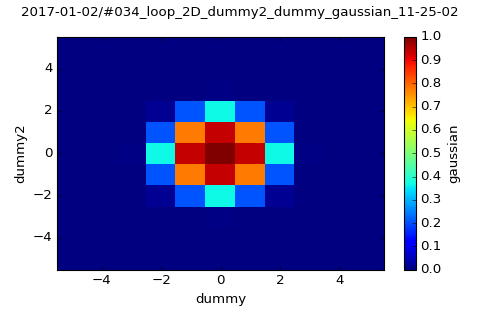

In [3]:
data.sync()
qc.MatPlot(data.gaussian)

# Measurement Parameters

## Peak parameter

In [2]:
dummy_parameter2(11)

In [3]:
from silq.parameters.measurement_parameters import TrackPeakParameter

peak_parameter = TrackPeakParameter('track', 
                                    set_parameter=dummy_parameter2,
                                    acquisition_parameter=gaussian_2D_parameter,
                                    peak_width=3, points=11,
                                    discriminant='gaussian',
                                    silent=False, threshold=0.2)

In [6]:
peak_parameter.measurement.

track measurement

In [4]:
data = qc.Loop(dummy_parameter[-3:6:0.5]).each(peak_parameter).run(name='test', background=Falseaa)

Updating set parameters to initial values
DataSet:
   mode = DataMode.PUSH_TO_SERVER
   data = qc.load_data('2017-01-02/#204_test_12-23-59')
   <Type>   | <array_id>       | <array.name>     | <array.shape>
   Setpoint | dummy_set        | dummy            | (18,)
   Measured | index0           | index0           | (18, 11)
   Measured | optimal_set_vals | optimal_set_vals | (18,)
   Measured | dummy2_set       | dummy2_set       | (18, 11)
   Measured | gaussian         | gaussian         | (18, 11)
started at 2017-01-02 12:23:59


AttributeError: 'Loop1DMeasurement' object has no attribute 'optimal_set_vals'

In [15]:
data.sync()
data.optimal_set_vals

DataArray[18]: optimal_set_vals
array([ 9.5,  8. ,  6.5,  5. ,  3.5,  2. ,  0.5, -0.1, -0.1, -0.1, -0.1,
       -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1])

<IPython.core.display.Javascript object>


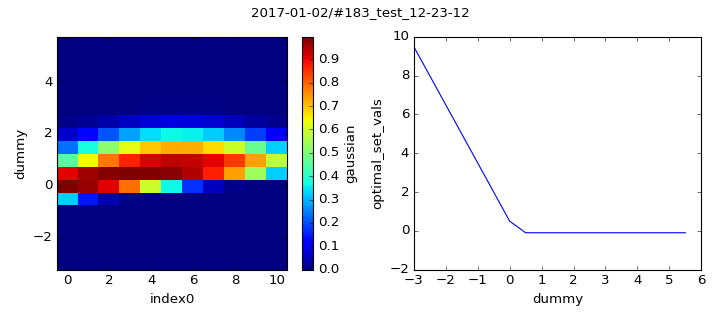

In [16]:
plot = qc.MatPlot(subplots=2)
plot[0].add(data.gaussian)
plot[1].add(data.optimal_set_vals)

## Calibration parameter

In [2]:
data = qc.Loop(
    dummy_parameter[-5:5:0.1]).loop(
    dummy_parameter2[-5:5:0.1]).each(
    gaussian_2D_parameter).run(
    name='test_2D')

DataSet:
   mode = DataMode.PULL_FROM_SERVER
   data = qc.load_data('2017-01-02/#002_test_2D_10-13-01')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | dummy_set  | dummy        | (100,)
   Setpoint | dummy2_set | dummy2       | (100, 100)
   Measured | gaussian   | gaussian     | (100, 100)
started at 2017-01-02 10:13:01


In [ ]:
condition_sets = [ConditionSet(('contrast', '>', 0.4), on_success='update')]
measurements = [Loop2DMeasurement('detailed', acquisition_parameter=adiabatic_ESR_parameter),
                Loop2DMeasurement('rough', acquisition_parameter=adiabatic_ESR_parameter)]
measurement_sequence = MeasurementSequence('retune', measurements=measurements,
                                           condition_sets=condition_sets)

In [ ]:
from silq.parameters.measurement_parameters import MeasurementSequenceParameter

peak_parameter = MeasurementSequenceParameter('calibration', 
                                              set_parameters=[dummy_parameter, dummy_parameter2],
                                              acquisition_parameter=gaussian_parameter,
                                              peak_width=3, points=10,
                                              discriminant='gaussian')